# Markov Project

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rand_unit():
    n = np.random.random_sample()
    if n > 0.5: return 1
    else: return -1

In [25]:
alpha = 5
beta = 0.5
N = 100

In [26]:
w_t = [rand_unit() for _ in range(N)]

In [27]:
# Matrix whose rows are samples
X_t = np.random.normal(size=(M, N))

In [28]:
# Class labels
y_t = [int(np.sign(X_t[i].dot(w_t))) for i in range(M)]

In [29]:
def compute_energy(w):
    s = 0
    for i in range(M):
        s += (y_t[i] - int(np.sign(X_t[i].dot(w))))**2
    return s/2

In [38]:
def metro_chain(alpha, beta, N, verbose=False):
    M = int(alpha * N)
    # intialization
    
    current_w = [rand_unit() for _ in range(N)]
    current_energy = compute_energy(current_w)
    
    energy = []
    energy.append(current_energy)
    
    counter = 0
    
    while current_energy > 0:
        current_energy = compute_energy(current_w)
        
        counter += 1
        if verbose and counter % 100 == 0:
            print('Iteration {} and energy : {}'.format(counter, current_energy))
        
        # pick coordinate at random
        coord = np.random.randint(0, high=N)
        
        # flip this coordinate
        new_w = current_w.copy()
        new_w[coord] = -new_w[coord]
        
        # decide if new state is accepted 
        new_energy = compute_energy(new_w)
        a = np.exp(- beta * (new_energy - current_energy))
        if a >= 1:
            current_w = new_w
            energy.append(new_energy)
            continue
        else:
            r = np.random.random_sample()
            if r < a:
                current_w = new_w
                energy.append(new_energy)
                continue
            else:
                continue
                
    return energy

In [47]:
def get_energy(energies, num_iteration=10):
    n = np.max([len(i) for i in energies])
    energy = []
    for i in range(n):
        tmp = 0
        counter = 0
        for k in range(num_iteration):
            if i < len(energies[k]):
                tmp += energies[k][i]
                counter += 1

        energy.append(tmp/counter)
    return energy
    
def get_mean_energy(alpha, beta, N, verbose=False, num_iteration=10):
    energies = []
    for _ in range(num_iteration):
        tmp = metro_chain(alpha=alpha, beta=beta, N=N, verbose=verbose)
        energies.append(tmp)
        print(len(tmp))
    energy = get_energy(energies, num_iteration=num_iteration)
    return energy

In [48]:
energy = get_mean_energy(alpha=5, beta=0.5, N=100)

122
102
152
148
114
185
94
114
166
165


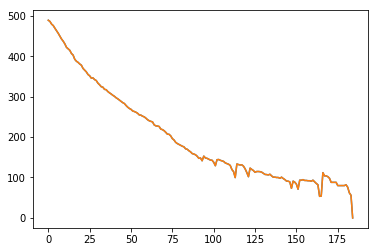

In [50]:
plt.plot(energy)
plt.show()